# ARMA Models
> Dive straight in and learn about the most important properties of time series. You'll learn about stationarity and how this is important for ARMA models. You'll learn how to test for stationarity by eye and with a standard statistical test. Finally, you'll learn the basic structure of ARMA models and use this to generate some ARMA data and fit an ARMA model. This is the Summary of lecture "ARIMA Models in Python", via datacamp.

- toc: true 
- badges: true
- comments: true
- author: Chanseok Kang
- categories: [Python, Datacamp, Time-Series Analysis]
- image: 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (10, 5)
plt.style.use('fivethirtyeight')

## Intro to time series and stationarity


### Exploration
In this exercise you will kick off your journey to become an ARIMA master by loading and plotting a time series. You probably do this all the time, but this is just a refresher.

You will be exploring a dataset of monthly US candy production between 1972 and 2018.

Specifically, you are plotting the industrial production index IPG3113N. This is total amount of sugar and confectionery products produced in the USA per month, as a percentage of the January 2012 production. So 120 would be 120% of the January 2012 industrial production.

Check out how this quantity has changed over time and how it changes throughout the year.

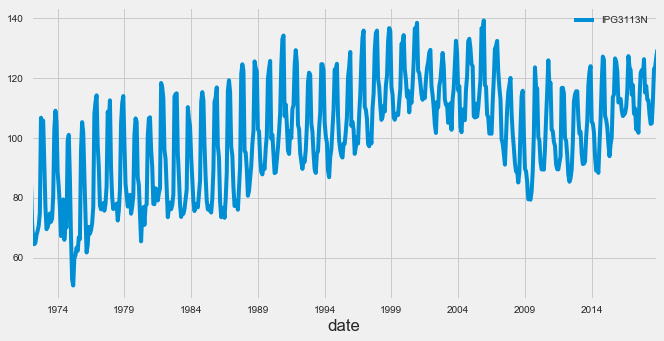

In [4]:
# Load in the time series
candy = pd.read_csv('./dataset/candy_production.csv', index_col='date', parse_dates=True)

# Plot ant show the time series on axis ax
fig, ax = plt.subplots();
candy.plot(ax=ax);

### Train-test splits
In this exercise you are going to take the candy production dataset and split it into a train and a test set. Like you understood in the video exercise, the reason to do this is so that you can test the quality of your model fit when you are done.

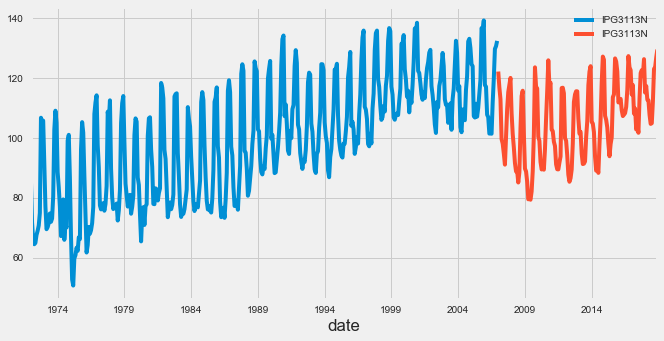

In [6]:
# Split the data into a train and test set
candy_train = candy.loc[:'2006']
candy_test = candy.loc['2007':]

# Create an axis
fig, ax = plt.subplots();

# Plot the train and test sets on the axis ax
candy_train.plot(ax=ax);
candy_test.plot(ax=ax);

### Is it stationary
Identifying whether a time series is stationary or non-stationary is very important. If it is stationary you can use ARMA models to predict the next values of the time series. If it is non-stationary then you cannot use ARMA models, however, as you will see in the next lesson, you can often transform non-stationary time series to stationary ones.

## Making time series stationary
- The augmented Dicky-Fuller test
    - Tests for non-stationary
    - Null hypothesis is time series is non-stationary

### Augmented Dicky-Fuller
In this exercise you will run the augmented Dicky-Fuller test on the earthquakes time series to test for stationarity. You plotted this time series in the last exercise. It looked like it could be stationary, but earthquakes are very damaging. If you want to make predictions about them you better be sure.

Remember that if it were not stationary this would mean that the number of earthquakes per year has a trend and is changing. This would be terrible news if it is trending upwards, as it means more damage. It would also be terrible news if it were trending downwards, it might suggest the core of our planet is changing and this could have lots of knock on effects for us!



In [11]:
earthquake = pd.read_csv('./dataset/earthquakes.csv', index_col='date', parse_dates=True)
earthquake.drop(['Year'], axis=1, inplace=True)

In [12]:
earthquake

,earthquakes_per_year
date,
1900-01-01,13.0
1901-01-01,14.0
1902-01-01,8.0
1903-01-01,10.0
1904-01-01,16.0
...,...
1994-01-01,15.0
1995-01-01,25.0
1996-01-01,22.0


In [17]:
from statsmodels.tsa.stattools import adfuller

# Run test
result = adfuller(earthquake['earthquakes_per_year'])

# Print test statistic
print(result[0])

# Print p-value
print(result[1])

# Print critical values
print(result[4]) 

-3.1831922511917825
0.020978425256003668
{'1%': -3.5003788874873405, '5%': -2.8921519665075235, '10%': -2.5830997960069446}


### Taking the difference
In this exercise, you will to prepare a time series of the population of a city for modeling. If you could predict the growth rate of a city then it would be possible to plan and build the infrastructure that the city will need later, thus future-proofing public spending. In this case the time series is fictitious but its perfect to practice on.

You will test for stationarity by eye and use the Augmented Dicky-Fuller test, and take the difference to make the dataset stationary.

In [18]:
city = pd.read_csv('./dataset/city.csv', parse_dates=True, index_col='date')

ADF Statistic: 5.297698878151176
p-value: 1.0


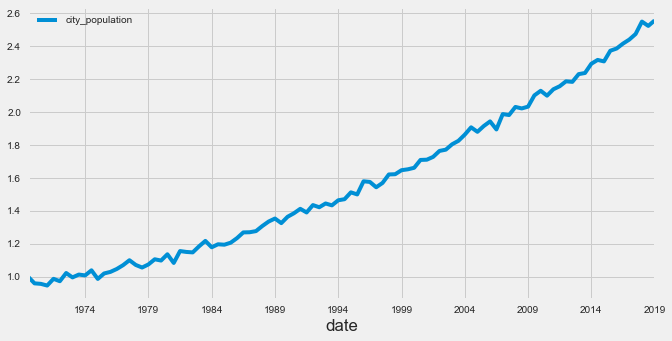

In [20]:
# Run the ADF test on the time series
result = adfuller(city['city_population'])

# Plot the time series
fig, ax = plt.subplots();
city.plot(ax=ax);

# Print the test statistic and the p-value
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -0.8146211646182338
p-value: 0.8147894381484713


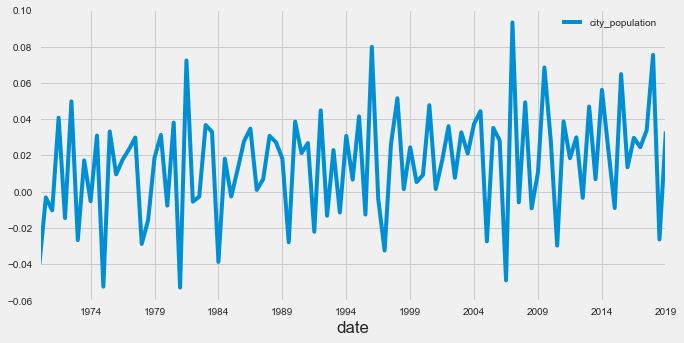

In [23]:
# Calculate the first difference of the time series
city_stationary = city.diff().dropna()

# Run ADF test on the differenced time series
result = adfuller(city_stationary['city_population'])

# Plot the differenced time series
fig, ax = plt.subplots();
city_stationary.plot(ax=ax);

# Print the test statistic and the p-value
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -6.43364603291871
p-value: 1.673449851040334e-08


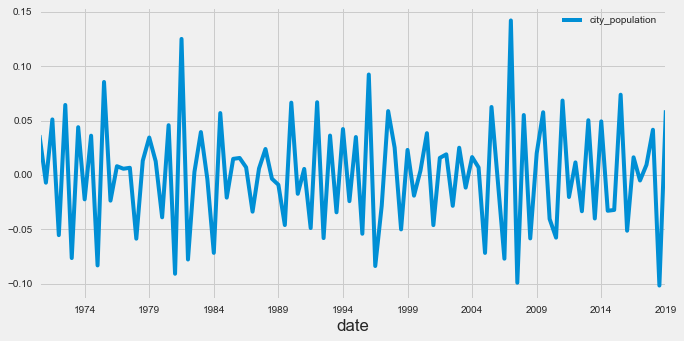

In [24]:
# Calculate the second difference of the time series
city_stationary = city.diff().diff().dropna()

# Run ADF test on the differenced time series
result = adfuller(city_stationary['city_population'])

# Plot the differenced time series
fig, ax = plt.subplots();
city_stationary.plot(ax=ax);

# Print the test statistic and the p-value
print('ADF Statistic:', result[0])
print('p-value:', result[1])